In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
#from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix,accuracy_score,classification_report
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, roc_curve 
from sklearn.metrics import classification_report, roc_auc_score, plot_roc_curve
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [5]:
#os.chdir(r'C:\Users\prett\Desktop\AML Project')
df= pd.read_csv("C:\\Users\\yamin\\OneDrive\\Desktop\\Applied ML\\online_shoppers_intention.csv")
df


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [6]:
#Checking for Null Values
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [7]:
df= df.drop_duplicates()

In [8]:
df.shape

(12205, 18)

In [9]:
df.dropna(axis=1)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [10]:
df.shape

(12205, 18)

In [11]:
df.dropna(axis=0)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [12]:
df.shape

(12205, 18)

In [13]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000
mean,2.338878,81.646331,0.508726,34.825454,32.045637,1206.982457,0.020370,0.041466,5.949574,0.061942,2.124211,2.357804,3.153298,4.073904
std,3.330436,177.491845,1.275617,141.424807,44.593649,1919.601400,0.045255,0.046163,18.653671,0.199666,0.906823,1.710114,2.402340,4.016654
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,8.000000,193.000000,0.000000,0.014231,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,9.000000,0.000000,0.000000,18.000000,608.942857,0.002899,0.025000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,94.700000,0.000000,0.000000,38.000000,1477.154762,0.016667,0.048529,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [14]:
list(df)

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'SpecialDay',
 'Month',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'VisitorType',
 'Weekend',
 'Revenue']

In [15]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


Text(0, 0.5, 'Density')

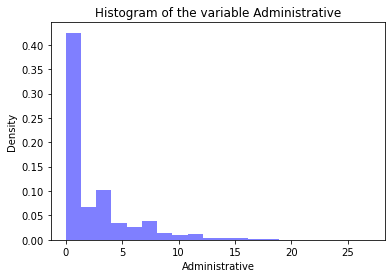

In [16]:
x=df['Administrative']
plt.hist(x,bins=20,color='b', alpha = 0.5,density=True)
plt.title('Histogram of the variable Administrative')
plt.xlabel('Administrative')
plt.ylabel('Density')

Text(0, 0.5, 'Density')

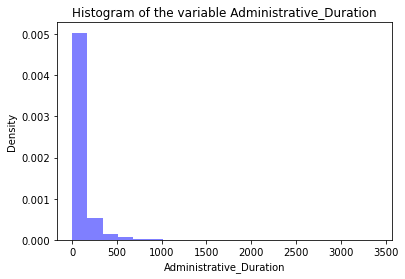

In [17]:
x=df['Administrative_Duration']
plt.hist(x,bins=20,color='b',alpha = 0.5,density=True)
plt.title('Histogram of the variable Administrative_Duration')
plt.xlabel('Administrative_Duration')
plt.ylabel('Density')

Text(0, 0.5, 'Density')

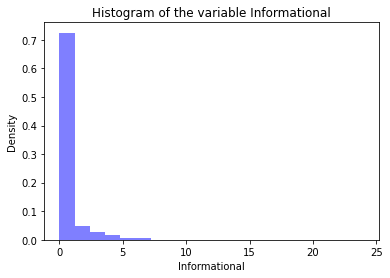

In [18]:
x=df['Informational']
plt.hist(x,bins=20,color='b',alpha = 0.5,density=True)
plt.title('Histogram of the variable Informational')
plt.xlabel('Informational')
plt.ylabel('Density')

Text(0, 0.5, 'Density')

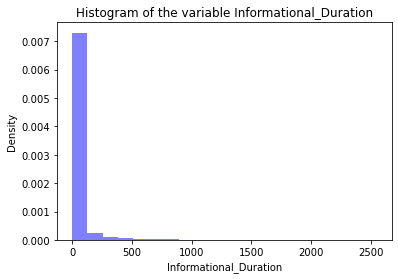

In [19]:
x=df['Informational_Duration']
plt.hist(x,bins=20,color='b',alpha = 0.5,density=True)
plt.title('Histogram of the variable Informational_Duration')
plt.xlabel('Informational_Duration')
plt.ylabel('Density')

Text(0, 0.5, 'Count')

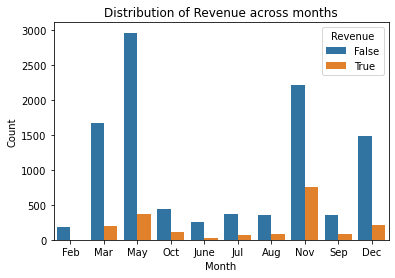

In [20]:
sns.countplot(x='Month',hue='Revenue',data=df)
plt.title('Distribution of Revenue across months')
plt.xlabel('Month')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

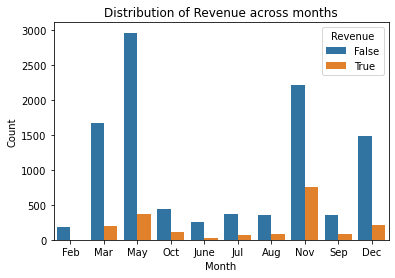

In [21]:
sns.countplot(x='Month',hue='Revenue',data=df)
plt.title('Distribution of Revenue across months')
plt.xlabel('Month')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

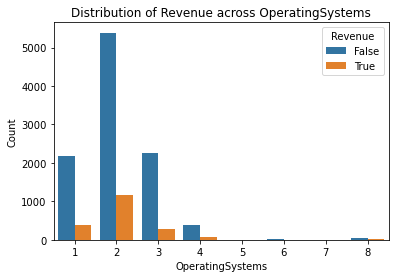

In [22]:
sns.countplot(x='OperatingSystems',hue='Revenue',data=df)
plt.title('Distribution of Revenue across OperatingSystems')
plt.xlabel('OperatingSystems')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

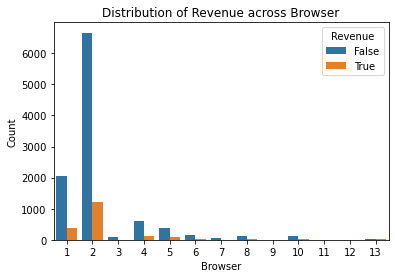

In [23]:
sns.countplot(x='Browser',hue='Revenue',data=df)
plt.title('Distribution of Revenue across Browser')
plt.xlabel('Browser')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

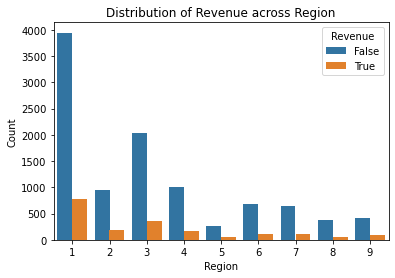

In [24]:
sns.countplot(x='Region',hue='Revenue',data=df)
plt.title('Distribution of Revenue across Region')
plt.xlabel('Region')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

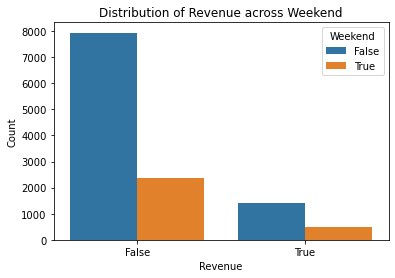

In [25]:
sns.countplot(x='Revenue',hue='Weekend',data=df)
plt.title('Distribution of Revenue across Weekend')
plt.xlabel('Revenue')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

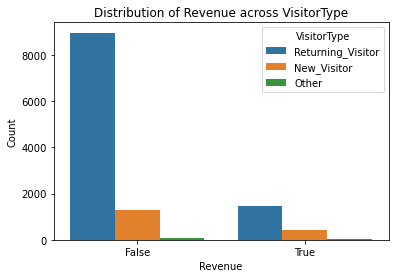

In [26]:
sns.countplot(x='Revenue',hue='VisitorType',data=df)
plt.title('Distribution of Revenue across VisitorType')
plt.xlabel('Revenue')
plt.ylabel('Count')

In [27]:
my_corr=df.corr()
my_corr

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1.000000,0.600457,0.375256,0.254813,0.428305,0.371146,-0.213096,-0.311255,0.097017,-0.096951,-0.006586,-0.025622,-0.007262,-0.034643,0.023825,0.136330
Administrative_Duration,0.600457,1.000000,0.301419,0.237211,0.286863,0.353583,-0.136913,-0.201971,0.066228,-0.074666,-0.007529,-0.015742,-0.006729,-0.014991,0.013259,0.091768
Informational,0.375256,0.301419,1.000000,0.618648,0.372572,0.386052,-0.109095,-0.159429,0.047406,-0.049350,-0.009721,-0.038787,-0.030317,-0.035197,0.034359,0.093626
Informational_Duration,0.254813,0.237211,0.618648,1.000000,0.279082,0.346596,-0.069878,-0.102852,0.030090,-0.031261,-0.009734,-0.019573,-0.027891,-0.025126,0.023193,0.069358
ProductRelated,0.428305,0.286863,0.372572,0.279082,1.000000,0.860330,-0.192884,-0.286082,0.054201,-0.025839,0.004194,-0.013586,-0.040108,-0.044223,0.013477,0.156042
ProductRelated_Duration,0.371146,0.353583,0.386052,0.346596,0.860330,1.000000,-0.173829,-0.245265,0.050923,-0.038122,0.002870,-0.007724,-0.034869,-0.037390,0.004903,0.150077
BounceRates,-0.213096,-0.136913,-0.109095,-0.069878,-0.192884,-0.173829,1.000000,0.902144,-0.115799,0.088626,0.026811,-0.015501,0.002787,0.089184,-0.034808,-0.145091
ExitRates,-0.311255,-0.201971,-0.159429,-0.102852,-0.286082,-0.245265,0.902144,1.000000,-0.173627,0.117176,0.016345,-0.003323,-0.000987,0.087478,-0.053061,-0.204320
PageValues,0.097017,0.066228,0.047406,0.030090,0.054201,0.050923,-0.115799,-0.173627,1.000000,-0.064481,0.018632,0.045908,0.010588,0.012286,0.010801,0.491894
SpecialDay,-0.096951,-0.074666,-0.049350,-0.031261,-0.025839,-0.038122,0.088626,0.117176,-0.064481,1.000000,0.012806,0.003528,-0.016450,0.052856,-0.017723,-0.083601


<AxesSubplot:>

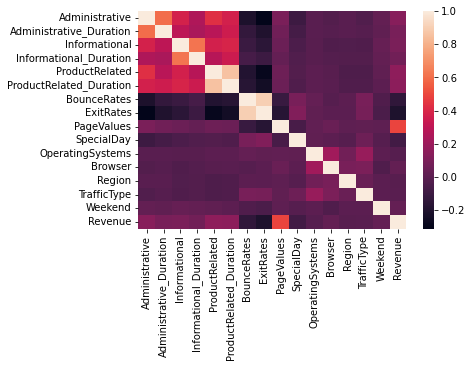

In [28]:
sns.heatmap(my_corr)

In [29]:
my_corr=df[['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration']].corr()
my_corr

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration
Administrative,1.000000,0.600457,0.375256,0.254813,0.428305,0.371146
Administrative_Duration,0.600457,1.000000,0.301419,0.237211,0.286863,0.353583
Informational,0.375256,0.301419,1.000000,0.618648,0.372572,0.386052
Informational_Duration,0.254813,0.237211,0.618648,1.000000,0.279082,0.346596
ProductRelated,0.428305,0.286863,0.372572,0.279082,1.000000,0.860330
ProductRelated_Duration,0.371146,0.353583,0.386052,0.346596,0.860330,1.000000


<AxesSubplot:>

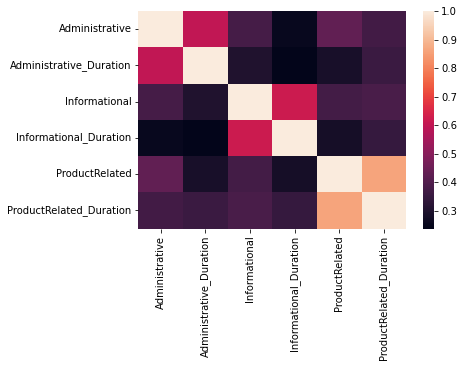

In [30]:
sns.heatmap(my_corr)

In [31]:
my_corr=df[['BounceRates','ExitRates']].corr()
my_corr

,BounceRates,ExitRates
BounceRates,1.000000,0.902144
ExitRates,0.902144,1.000000


<AxesSubplot:>

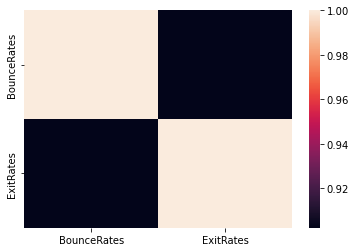

In [32]:
sns.heatmap(my_corr)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12205 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12205 non-null  int64  
 1   Administrative_Duration  12205 non-null  float64
 2   Informational            12205 non-null  int64  
 3   Informational_Duration   12205 non-null  float64
 4   ProductRelated           12205 non-null  int64  
 5   ProductRelated_Duration  12205 non-null  float64
 6   BounceRates              12205 non-null  float64
 7   ExitRates                12205 non-null  float64
 8   PageValues               12205 non-null  float64
 9   SpecialDay               12205 non-null  float64
 10  Month                    12205 non-null  object 
 11  OperatingSystems         12205 non-null  int64  
 12  Browser                  12205 non-null  int64  
 13  Region                   12205 non-null  int64  
 14  TrafficType           

In [34]:
df['Revenue'] = df['Revenue'].astype(int)
df['Weekend'] = df['Weekend'].astype(int)

df['Month'] = df['Month'].astype('category')
df['Region'] = df['Region'].astype('category')
df['VisitorType'] = df['VisitorType'].astype('category')

df['OperatingSystems'] = df['OperatingSystems'].astype('category')
df['Browser'] = df['Browser'].astype('category')
df['TrafficType'] = df['TrafficType'].astype('category')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12205 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Administrative           12205 non-null  int64   
 1   Administrative_Duration  12205 non-null  float64 
 2   Informational            12205 non-null  int64   
 3   Informational_Duration   12205 non-null  float64 
 4   ProductRelated           12205 non-null  int64   
 5   ProductRelated_Duration  12205 non-null  float64 
 6   BounceRates              12205 non-null  float64 
 7   ExitRates                12205 non-null  float64 
 8   PageValues               12205 non-null  float64 
 9   SpecialDay               12205 non-null  float64 
 10  Month                    12205 non-null  category
 11  OperatingSystems         12205 non-null  category
 12  Browser                  12205 non-null  category
 13  Region                   12205 non-null  category
 14  Traffi

In [36]:
scaler = StandardScaler()
df[['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration']]=scaler.fit_transform(df[['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration']])
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,-0.702302,-0.460019,-0.398824,-0.246257,-0.696218,-0.628793,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,0,0
1,-0.702302,-0.460019,-0.398824,-0.246257,-0.673793,-0.595451,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,0,0
2,-0.702302,-0.460019,-0.398824,-0.246257,-0.696218,-0.628793,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,0,0
3,-0.702302,-0.460019,-0.398824,-0.246257,-0.673793,-0.627404,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,0,0
4,-0.702302,-0.460019,-0.398824,-0.246257,-0.494387,-0.301889,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0.198517,0.356953,-0.398824,-0.246257,0.469915,0.300496,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,1,0
12326,-0.702302,-0.460019,-0.398824,-0.246257,-0.606516,-0.386155,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,1,0
12327,-0.702302,-0.460019,-0.398824,-0.246257,-0.584090,-0.532806,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,1,0
12328,0.498791,-0.037447,-0.398824,-0.246257,-0.382259,-0.448540,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,0,0


In [37]:
dummies_month = pd.get_dummies(df['Month'])
dummies_region = pd.get_dummies(df['Region'])
dummies_visitortype = pd.get_dummies(df['VisitorType'])
df = pd.concat([df,dummies_month,dummies_region,dummies_visitortype], axis = 1)
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,3,4,5,6,7,8,9,New_Visitor,Other,Returning_Visitor
0,-0.702302,-0.460019,-0.398824,-0.246257,-0.696218,-0.628793,0.200000,0.200000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
1,-0.702302,-0.460019,-0.398824,-0.246257,-0.673793,-0.595451,0.000000,0.100000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
2,-0.702302,-0.460019,-0.398824,-0.246257,-0.696218,-0.628793,0.200000,0.200000,0.000000,0.0,...,0,0,0,0,0,0,1,0,0,1
3,-0.702302,-0.460019,-0.398824,-0.246257,-0.673793,-0.627404,0.050000,0.140000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
4,-0.702302,-0.460019,-0.398824,-0.246257,-0.494387,-0.301889,0.020000,0.050000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0.198517,0.356953,-0.398824,-0.246257,0.469915,0.300496,0.007143,0.029031,12.241717,0.0,...,0,0,0,0,0,0,0,0,0,1
12326,-0.702302,-0.460019,-0.398824,-0.246257,-0.606516,-0.386155,0.000000,0.021333,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
12327,-0.702302,-0.460019,-0.398824,-0.246257,-0.584090,-0.532806,0.083333,0.086667,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
12328,0.498791,-0.037447,-0.398824,-0.246257,-0.382259,-0.448540,0.000000,0.021053,0.000000,0.0,...,1,0,0,0,0,0,0,0,0,1


In [38]:
df.rename(columns={1:'Reg1',2:'Reg2',3:'Reg3',4:'Reg4',5:'Reg5',6:'Reg6',7:'Reg7',8:'Reg8',9:'Reg9'}, inplace=True)
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Reg3,Reg4,Reg5,Reg6,Reg7,Reg8,Reg9,New_Visitor,Other,Returning_Visitor
0,-0.702302,-0.460019,-0.398824,-0.246257,-0.696218,-0.628793,0.200000,0.200000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
1,-0.702302,-0.460019,-0.398824,-0.246257,-0.673793,-0.595451,0.000000,0.100000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
2,-0.702302,-0.460019,-0.398824,-0.246257,-0.696218,-0.628793,0.200000,0.200000,0.000000,0.0,...,0,0,0,0,0,0,1,0,0,1
3,-0.702302,-0.460019,-0.398824,-0.246257,-0.673793,-0.627404,0.050000,0.140000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
4,-0.702302,-0.460019,-0.398824,-0.246257,-0.494387,-0.301889,0.020000,0.050000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0.198517,0.356953,-0.398824,-0.246257,0.469915,0.300496,0.007143,0.029031,12.241717,0.0,...,0,0,0,0,0,0,0,0,0,1
12326,-0.702302,-0.460019,-0.398824,-0.246257,-0.606516,-0.386155,0.000000,0.021333,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
12327,-0.702302,-0.460019,-0.398824,-0.246257,-0.584090,-0.532806,0.083333,0.086667,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
12328,0.498791,-0.037447,-0.398824,-0.246257,-0.382259,-0.448540,0.000000,0.021053,0.000000,0.0,...,1,0,0,0,0,0,0,0,0,1


In [39]:
X = df[['Informational_Duration','ProductRelated_Duration','ExitRates','PageValues','Weekend','Returning_Visitor','Other',
        'Dec','Feb','Jul','June','Mar','May','Nov','Oct','Sep','Reg1','Reg2','Reg3','Reg4','Reg5','Reg6','Reg7','Reg8']]
y = df['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression

In [40]:
model = LogisticRegression()
model.fit(X_train,y_train)
pred = model.predict(X_test)

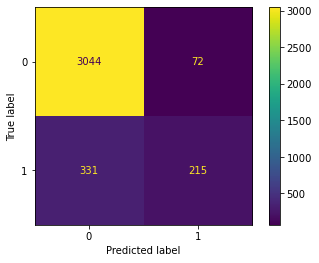

In [41]:
plot_confusion_matrix(model,X_test,y_test)

In [42]:
model.score(X_train,y_train)

0.879199344492567

In [43]:
print(accuracy_score(y_test,pred))

0.8899508465319498


In [44]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      3116
           1       0.75      0.39      0.52       546

    accuracy                           0.89      3662
   macro avg       0.83      0.69      0.73      3662
weighted avg       0.88      0.89      0.88      3662



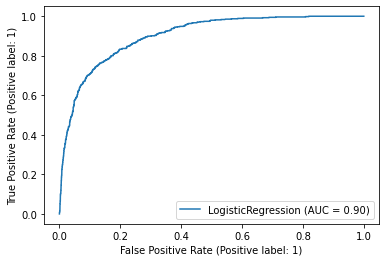

In [45]:
plot_roc_curve(model,X_test,y_test)

# Lasso

In [46]:
Reg = LogisticRegression(solver = 'liblinear', penalty = 'l1', random_state=42).fit(X_train,y_train)
y_pred = Reg.predict(X_test)

print(f"Lasso Classifier:")
print(f"Intercept is {Reg.intercept_}")
print(f"Coefficients are {Reg.coef_}")
print(f"Accuracy is {round(Reg.score(X_test, y_test),4)}")
print(f"AUC Score is {round(roc_auc_score(y_test,y_pred),4)}")

Lasso Classifier:
Intercept is [-1.60157364]
Coefficients are [[ 1.90818913e-02  2.22384432e-01 -1.36807249e+01  8.32178018e-02
   4.44474516e-02 -3.67228904e-01 -3.46063741e-01 -5.35846695e-01
  -1.64745150e+00  2.07860641e-01 -3.22828253e-01 -4.08684524e-01
  -5.50069019e-01  5.57699018e-01  0.00000000e+00  1.00150593e-02
  -3.92992503e-02  1.01312018e-01  6.82884661e-02 -4.66897006e-02
  -2.83380197e-01  0.00000000e+00  2.22687410e-02  6.25295488e-02]]
Accuracy is 0.8908
AUC Score is 0.6873


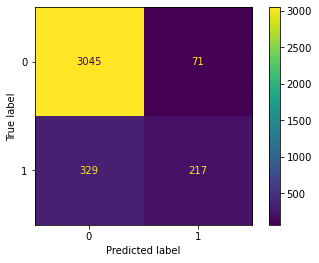

In [47]:
plot_confusion_matrix(Reg,X_test,y_test)

In [48]:
print(f"classification report:")
print(f"{classification_report(y_test,y_pred)}")

classification report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      3116
           1       0.75      0.40      0.52       546

    accuracy                           0.89      3662
   macro avg       0.83      0.69      0.73      3662
weighted avg       0.88      0.89      0.88      3662



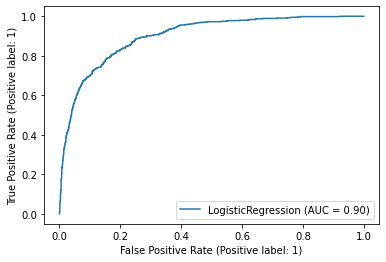

In [49]:
plot_roc_curve(Reg,X_test,y_test)

# Ridge Classifier

In [50]:
RidReg = LogisticRegression(solver='liblinear', penalty='l2', random_state=6).fit(X_train,y_train)
y_pred = RidReg.predict(X_test)

print(f"Ridge Classifier:")
print(f"Intercept is {RidReg.intercept_}")
print(f"Coefficients are {RidReg.coef_}")
print(f"Accuracy is {round(RidReg.score(X_test,y_test),4)}")
print(f"AUC Score is {round(roc_auc_score(y_test,y_pred),4)}")

Ridge Classifier:
Intercept is [-1.78496314]
Coefficients are [[ 0.02332348  0.2625526  -4.92487921  0.08645148  0.06553072 -0.51083328
  -0.61376698 -0.54058906 -1.47101416  0.20745346 -0.41406426 -0.39621739
  -0.56231581  0.5627114   0.02051947  0.05356614 -0.01741196  0.1379781
   0.09364319 -0.0357204  -0.28123794  0.03829855  0.08141444  0.12346461]]
Accuracy is 0.89
AUC Score is 0.6853


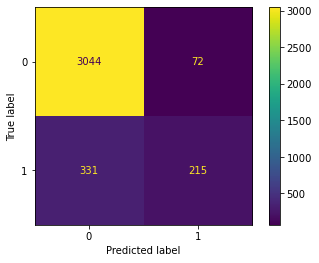

In [51]:
plot_confusion_matrix(RidReg,X_test,y_test)

In [52]:
print(f"classification report:")
print(f"{classification_report(y_test,y_pred)}")

classification report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      3116
           1       0.75      0.39      0.52       546

    accuracy                           0.89      3662
   macro avg       0.83      0.69      0.73      3662
weighted avg       0.88      0.89      0.88      3662



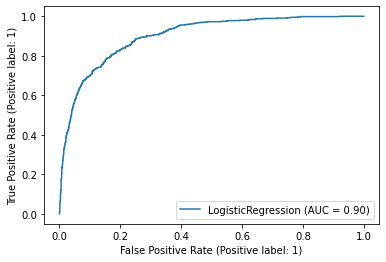

In [53]:
plot_roc_curve(Reg,X_test,y_test)

# KNN CLASSIFIER

In [54]:
Knn_reg = KNeighborsClassifier(n_neighbors=5).fit(X_train,y_train)
y_pred = Knn_reg.predict(X_test)
Adj_r2 = 1 - (1-r2_score(y_test, y_pred)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print(f"kNN Classifier:")
print(f"Accuracy is {round(Knn_reg.score(X_test,y_test),4)}")
print(f"AUC Score is {round(roc_auc_score(y_test,y_pred),4)}")

kNN Classifier:
Accuracy is 0.8867
AUC Score is 0.7506


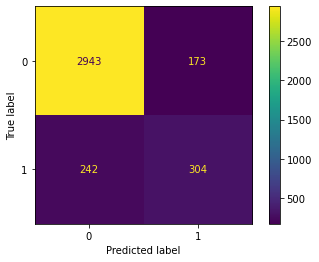

In [55]:
plot_confusion_matrix(Knn_reg,X_test,y_test)

In [56]:
print(f"classification report:")
print(f"{classification_report(y_test,y_pred)}")

classification report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      3116
           1       0.64      0.56      0.59       546

    accuracy                           0.89      3662
   macro avg       0.78      0.75      0.76      3662
weighted avg       0.88      0.89      0.88      3662



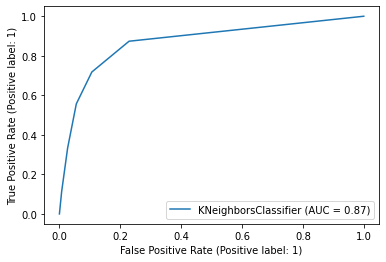

In [57]:
plot_roc_curve(Knn_reg,X_test,y_test)

# Decision Tree

Train Score for full tree is 0.999883
Test Score for full tree is 0.866193


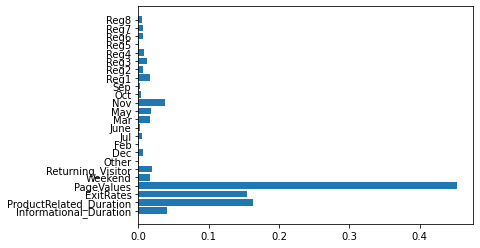

{'max_depth': 4, 'max_leaf_nodes': 10, 'min_samples_split': 2}
Train Score is 0.895002
Test Score is 0.892955


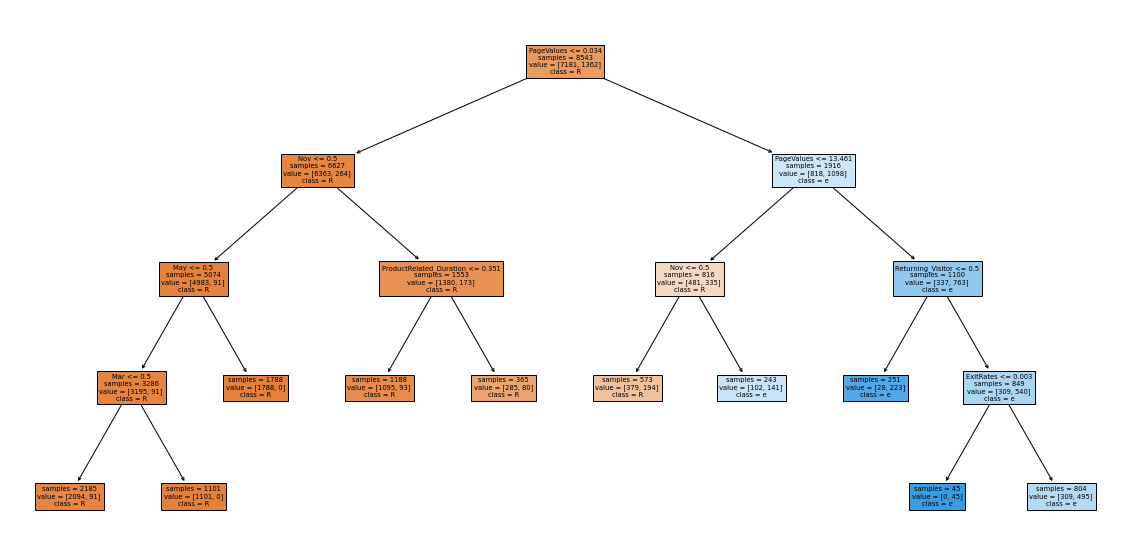

In [58]:
# Create a Decision Tree without Hyperparameter Tuning with entropy criterion
dt_full_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_full_entropy.fit(X_train, y_train)

# Evaluate the Accuracy of the Decision Tree Model
print(f"Train Score for full tree is {round(dt_full_entropy.score(X_train, y_train), 6)}")
print(f"Test Score for full tree is {round(dt_full_entropy.score(X_test, y_test), 6)}")

# Plot Feature Importance
dt_y = dt_full_entropy.feature_importances_
dt_x = list(X.keys())
plt.barh(dt_x, dt_y)
plt.show()

# Hyperparameter Tuning Using Grid Search with Gini criterion
opt_tree_1 = DecisionTreeClassifier(random_state=42, criterion='entropy')
dt_params_1 = {'max_depth': range(1, 10),
               'min_samples_split': range(2, 11),
               'max_leaf_nodes': range(2, 11)}

grid_tree_1 = GridSearchCV(opt_tree_1, dt_params_1)
grid_tree_1.fit(X_train, y_train)

# Report the best hyperparameters chosen
print(grid_tree_1.best_params_)

# Evaluate the Accuracy of the Tuned Decision Tree Model
print(f"Train Score is {round(grid_tree_1.score(X_train, y_train), 6)}")
print(f"Test Score is {round(grid_tree_1.score(X_test, y_test), 6)}")

# Plot the Decision Tree
fig = plt.figure(figsize=(20, 10))
plot_tree(grid_tree_1.best_estimator_, feature_names=list(X.keys()), class_names='Revenue', filled=True, impurity=False)
plt.show()

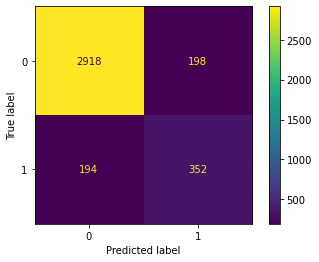

In [59]:
plot_confusion_matrix(grid_tree_1,X_test,y_test)

In [60]:
y_pred=grid_tree_1.predict(X_test)
print(f"classification report:")
print(f"{classification_report(y_test,y_pred)}")

classification report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      3116
           1       0.64      0.64      0.64       546

    accuracy                           0.89      3662
   macro avg       0.79      0.79      0.79      3662
weighted avg       0.89      0.89      0.89      3662



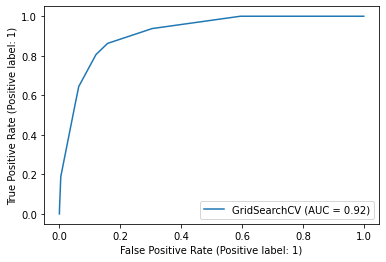

In [61]:
plot_roc_curve(grid_tree_1,X_test,y_test)

Train Score for full tree is 0.999883
Test Score for full tree is 0.857728


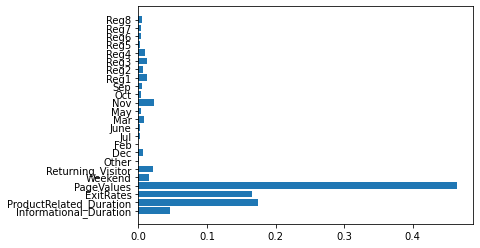

{'max_depth': 4, 'max_leaf_nodes': 7, 'min_samples_split': 2}
Train Score is 0.895119
Test Score is 0.893774


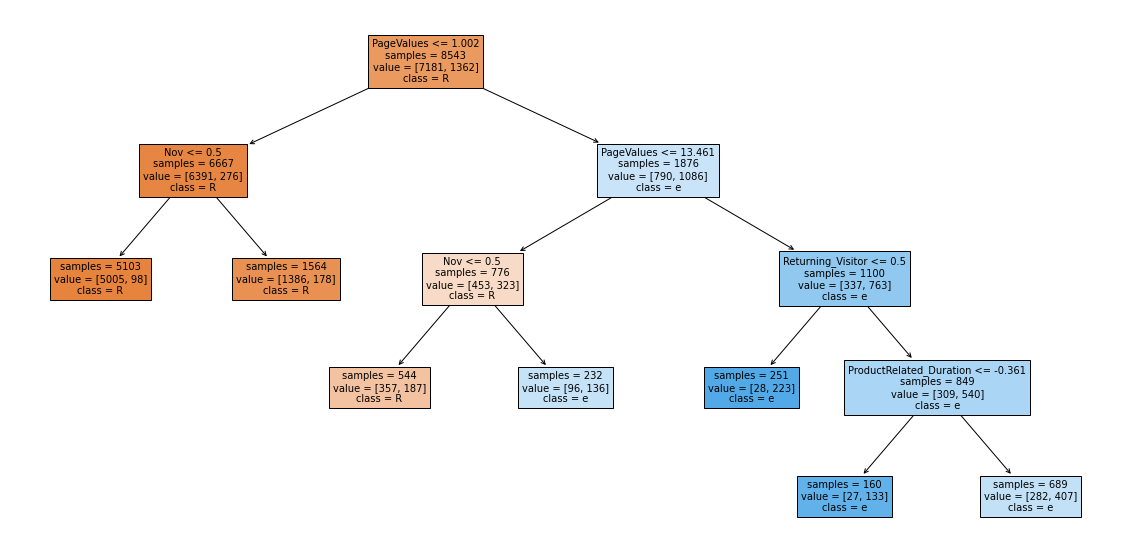

In [62]:
# Create a Decision Tree without Hyperparameter Tuning with Gini criterion
dt_full_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_full_gini.fit(X_train, y_train)

# Evaluate the Accuracy of the Decision Tree Model
print(f"Train Score for full tree is {round(dt_full_gini.score(X_train, y_train), 6)}")
print(f"Test Score for full tree is {round(dt_full_gini.score(X_test, y_test), 6)}")

# Plot Feature Importance
dt_y = dt_full_gini.feature_importances_
dt_x = list(X.keys())
plt.barh(dt_x, dt_y)
plt.show()

# Hyperparameter Tuning Using Grid Search with Gini criterion
opt_tree_2 = DecisionTreeClassifier(random_state=42, criterion='gini')
dt_params_2 = {'max_depth': range(1, 10),
               'min_samples_split': range(2, 11),
               'max_leaf_nodes': range(2, 11)}

grid_tree_2 = GridSearchCV(opt_tree_2, dt_params_2)
grid_tree_2.fit(X_train, y_train)

# Report the best hyperparameters chosen
print(grid_tree_2.best_params_)

# Evaluate the Accuracy of the Tuned Decision Tree Model
print(f"Train Score is {round(grid_tree_2.score(X_train, y_train), 6)}")
print(f"Test Score is {round(grid_tree_2.score(X_test, y_test), 6)}")

# Plot the Decision Tree
fig = plt.figure(figsize=(20, 10))
plot_tree(grid_tree_2.best_estimator_, feature_names=list(X.keys()), class_names='Revenue', filled=True, impurity=False)
plt.show()

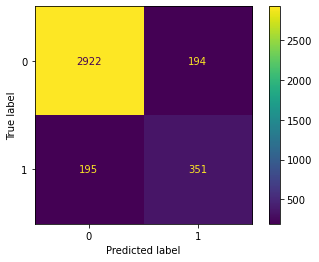

In [63]:
plot_confusion_matrix(grid_tree_2,X_test,y_test)

In [64]:
y_pred=grid_tree_2.predict(X_test)
print(f"classification report:")
print(f"{classification_report(y_test,y_pred)}")

classification report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      3116
           1       0.64      0.64      0.64       546

    accuracy                           0.89      3662
   macro avg       0.79      0.79      0.79      3662
weighted avg       0.89      0.89      0.89      3662



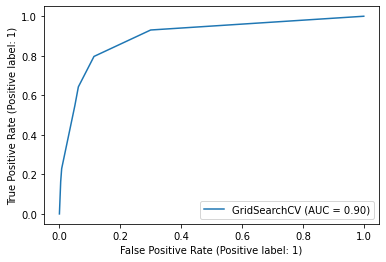

In [65]:
plot_roc_curve(grid_tree_2,X_test,y_test)

# Linear SVC

In [66]:
lr_svc = LinearSVC(random_state = 0) # C = 1 as default
lr_svc.fit(X_train, y_train)
y_pred=lr_svc.predict(X_test)

In [67]:
lr_svc.score(X_train, y_train), lr_svc.score(X_test, y_test)

(0.8891490108861055, 0.8910431458219552)

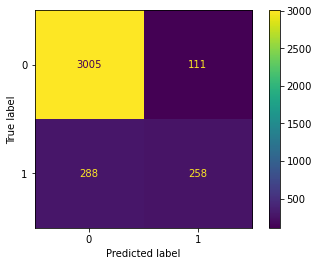

In [68]:
plot_confusion_matrix(lr_svc,X_test,y_test)

In [69]:
print(f"classification report:")
print(f"{classification_report(y_test,y_pred)}")

classification report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      3116
           1       0.70      0.47      0.56       546

    accuracy                           0.89      3662
   macro avg       0.81      0.72      0.75      3662
weighted avg       0.88      0.89      0.88      3662



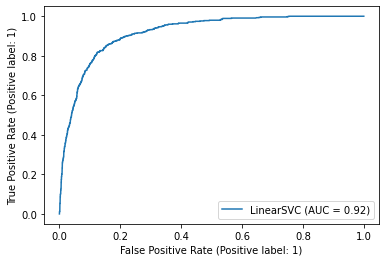

In [70]:
plot_roc_curve(lr_svc,X_test,y_test)

# Linear SVC with GridSearchCV

In [71]:
# Define Function
linear_svc = LinearSVC(random_state = 42)

# Define a list of hyperparameters
params_svc = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 100000]   }

# a large C approximates hard margin SVM scenario

grid_lrsvc = GridSearchCV(linear_svc, params_svc, n_jobs = 1)

grid_lrsvc.fit(X_train, y_train)

GridSearchCV(estimator=LinearSVC(random_state=42), n_jobs=1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 100000]})

In [72]:
grid_lrsvc.best_params_

{'C': 1}

In [73]:
grid_lrsvc.score(X_train, y_train), grid_lrsvc.score(X_test, y_test)

(0.8857544188224277, 0.8907700709994538)

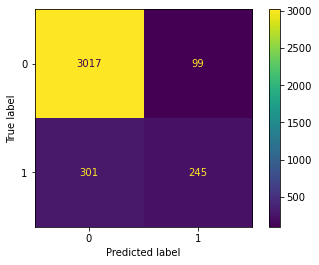

In [74]:
plot_confusion_matrix(grid_lrsvc,X_test,y_test)

In [75]:
y_pred=grid_lrsvc.predict(X_test)
print(f"classification report:")
print(f"{classification_report(y_test,y_pred)}")

classification report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      3116
           1       0.71      0.45      0.55       546

    accuracy                           0.89      3662
   macro avg       0.81      0.71      0.74      3662
weighted avg       0.88      0.89      0.88      3662



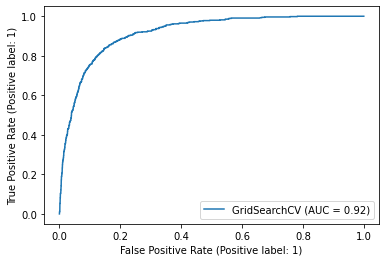

In [76]:
plot_roc_curve(grid_lrsvc,X_test,y_test)

# SVM with Kernel Functions

In [77]:
svm_base = SVC(random_state = 42, kernel = 'rbf')
svm_base.fit(X_train, y_train)
svm_base.score(X_train, y_train),svm_base.score(X_test, y_test)

(0.8916071637598033, 0.8904969961769524)

In [78]:
# Define Function
svc = SVC(random_state = 42, kernel = 'rbf')

#define a list of parameters
param_svc_kernel = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 10000]  ,
                    'gamma': [0.0001, 0.001,0.001,0.1,1,10]     } # C = 10,000 mimics hard-margin SVM

#apply grid search
grid_svc = GridSearchCV(svc, param_svc_kernel, cv = 5, n_jobs=1)

grid_svc.fit(X_train, y_train)
grid_svc.best_params_

{'C': 10000, 'gamma': 0.001}

In [79]:
grid_svc.score(X_train, y_train),grid_svc.score(X_test, y_test)

(0.9046002575207772, 0.8970507919169852)

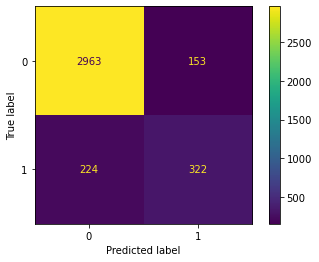

In [80]:
plot_confusion_matrix(grid_svc,X_test,y_test)

In [81]:
y_pred=grid_svc.predict(X_test)
print(f"classification report:")
print(f"{classification_report(y_test,y_pred)}")

classification report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      3116
           1       0.68      0.59      0.63       546

    accuracy                           0.90      3662
   macro avg       0.80      0.77      0.79      3662
weighted avg       0.89      0.90      0.89      3662



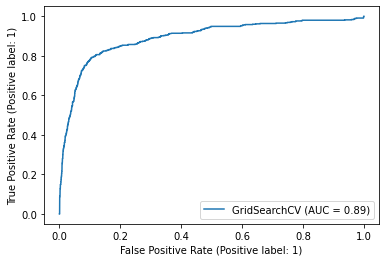

In [82]:
plot_roc_curve(grid_svc,X_test,y_test)

# Voting Classifier

In [83]:
log_clf = LogisticRegression(random_state=42)
svm_clf = SVC(kernel = 'rbf', random_state=42) 
dt_clf = DecisionTreeClassifier(random_state=42)

In [84]:
from sklearn.ensemble import VotingClassifier
# define voting classifier
voting_clf = VotingClassifier(
    estimators = [  ('Logistic', log_clf)  , ('Kernel_SVM', svm_clf) , ('Decision_Tree', dt_clf )],
    voting = 'hard')

# train the model
voting_clf.fit(X_train, y_train)
# Performance Measure
print("Train score for voting classifier is:", voting_clf.score(X_train, y_train))
print("Test score for voting classifier is:", voting_clf.score(X_test, y_test))

Train score for voting classifier is: 0.9156034180030435
Test score for voting classifier is: 0.892408519934462


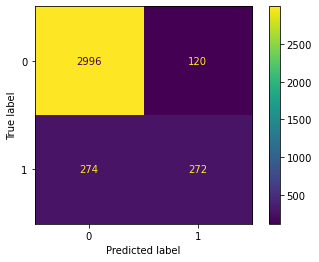

In [85]:
plot_confusion_matrix(voting_clf,X_test,y_test)

In [86]:
y_pred=voting_clf.predict(X_test)
print(f"classification report:")
print(f"{classification_report(y_test,y_pred)}")

classification report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      3116
           1       0.69      0.50      0.58       546

    accuracy                           0.89      3662
   macro avg       0.81      0.73      0.76      3662
weighted avg       0.88      0.89      0.88      3662



# Bagging Classifier

In [87]:
dt = DecisionTreeClassifier(random_state=42)

bag_clf = BaggingClassifier(dt, max_samples = 100, n_estimators = 10, bootstrap = True,
                            random_state=42)
bag_clf.fit(X_train, y_train)
bag_clf.score(X_train, y_train),bag_clf.score(X_test, y_test)

(0.8825939365562449, 0.8929546695794648)

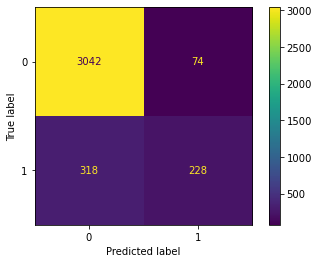

In [88]:
plot_confusion_matrix(bag_clf,X_test,y_test)

In [89]:
y_pred=bag_clf.predict(X_test)
print(f"classification report:")
print(f"{classification_report(y_test,y_pred)}")

classification report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      3116
           1       0.75      0.42      0.54       546

    accuracy                           0.89      3662
   macro avg       0.83      0.70      0.74      3662
weighted avg       0.88      0.89      0.88      3662



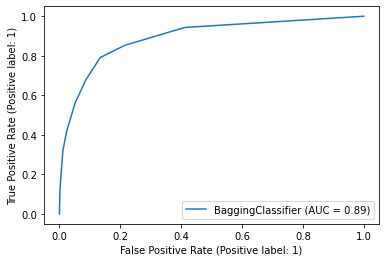

In [90]:
plot_roc_curve(bag_clf,X_test,y_test)

In [91]:
lg = LogisticRegression(random_state=42)

bag_clf = BaggingClassifier(lg, max_samples = 100, n_estimators = 10, bootstrap = True,
                            random_state=42)
bag_clf.fit(X_train, y_train)
bag_clf.score(X_train, y_train),bag_clf.score(X_test, y_test)

(0.8763900269226267, 0.8861277990169306)

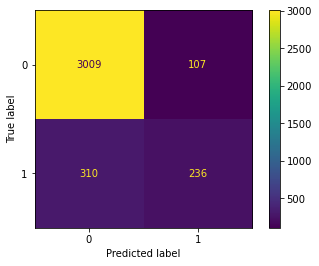

In [92]:
plot_confusion_matrix(bag_clf,X_test,y_test)

In [93]:
y_pred=bag_clf.predict(X_test)
print(f"classification report:")
print(f"{classification_report(y_test,y_pred)}")

classification report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      3116
           1       0.69      0.43      0.53       546

    accuracy                           0.89      3662
   macro avg       0.80      0.70      0.73      3662
weighted avg       0.87      0.89      0.87      3662



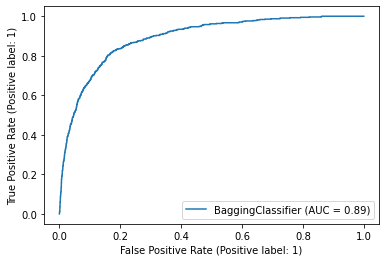

In [94]:
plot_roc_curve(bag_clf,X_test,y_test)

In [95]:
lSVC = LinearSVC(random_state=42)

bag_clf = BaggingClassifier(lSVC, max_samples = 100, n_estimators = 10, bootstrap = True,
                            random_state=42)
bag_clf.fit(X_train, y_train)
bag_clf.score(X_train, y_train),bag_clf.score(X_test, y_test)

(0.8782629053025869, 0.8883123975969416)

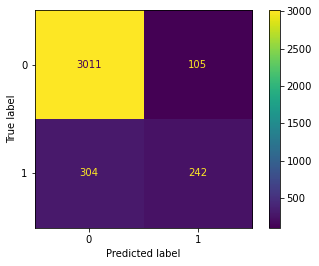

In [96]:
plot_confusion_matrix(bag_clf,X_test,y_test)

In [97]:
y_pred=bag_clf.predict(X_test)
print(f"classification report:")
print(f"{classification_report(y_test,y_pred)}")

classification report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      3116
           1       0.70      0.44      0.54       546

    accuracy                           0.89      3662
   macro avg       0.80      0.70      0.74      3662
weighted avg       0.88      0.89      0.88      3662



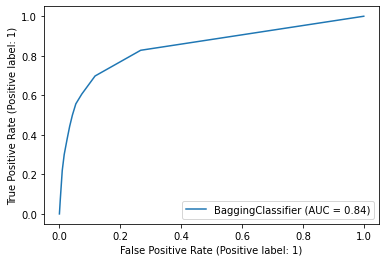

In [98]:
plot_roc_curve(bag_clf,X_test,y_test)

# Random Forest Classifier

In [99]:
rf = RandomForestClassifier(n_estimators = 10, max_samples = 100, random_state = 42) 
rf.fit(X_train, y_train)
rf.score(X_test, y_test),rf.score(X_test, y_test), rf.feature_importances_

(0.8656471873293282,
 0.8656471873293282,
 array([0.13418096, 0.06903292, 0.21272238, 0.26172561, 0.03576398,
        0.01164523, 0.        , 0.02491383, 0.00029406, 0.        ,
        0.00104093, 0.01135936, 0.02491004, 0.04165739, 0.02026675,
        0.00751634, 0.04075008, 0.01795355, 0.03387539, 0.03139116,
        0.0019862 , 0.00903925, 0.00623304, 0.00174155]))

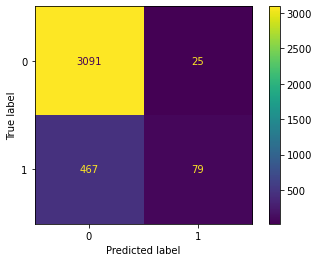

In [100]:
plot_confusion_matrix(rf,X_test,y_test)

In [101]:
y_pred=rf.predict(X_test)
print(f"classification report:")
print(f"{classification_report(y_test,y_pred)}")

classification report:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93      3116
           1       0.76      0.14      0.24       546

    accuracy                           0.87      3662
   macro avg       0.81      0.57      0.58      3662
weighted avg       0.85      0.87      0.82      3662



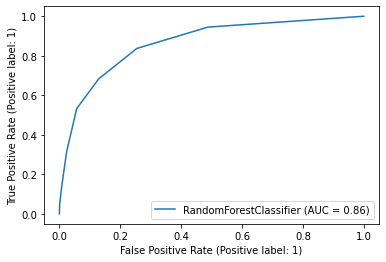

In [102]:
plot_roc_curve(rf,X_test,y_test)

# AdaBoost Classifier

In [103]:
from sklearn.ensemble import AdaBoostClassifier

# Define base model
dt1 = DecisionTreeClassifier(max_depth = 1, random_state = 42)
# AdaBoost
adaboost = AdaBoostClassifier(dt1, n_estimators = 10, learning_rate = 0.5, random_state = 42)
adaboost.fit(X_train, y_train)
# Performance
adaboost.score(X_train, y_train),adaboost.score(X_test, y_test)

(0.8952358656209762, 0.8937738940469688)

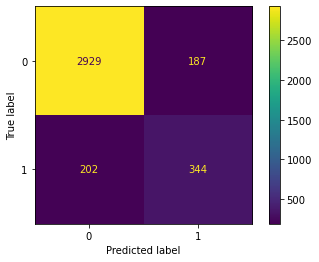

In [104]:
plot_confusion_matrix(adaboost,X_test,y_test)

In [105]:
y_pred=adaboost.predict(X_test)
print(f"classification report:")
print(f"{classification_report(y_test,y_pred)}")

classification report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      3116
           1       0.65      0.63      0.64       546

    accuracy                           0.89      3662
   macro avg       0.79      0.79      0.79      3662
weighted avg       0.89      0.89      0.89      3662



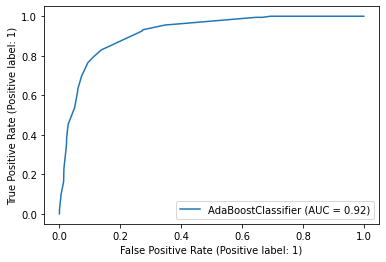

In [106]:
plot_roc_curve(adaboost,X_test,y_test)